### 1.2

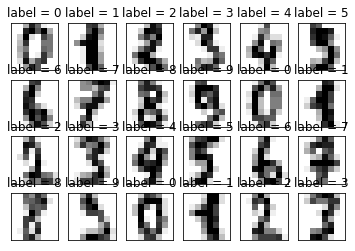

In [1]:
# 导入matplotlib和sklearn库，这两个库在后面的课程中会经常用到
import matplotlib.pyplot as plt
from sklearn import datasets

# 取出sklearn里面的手写识别图片
digits = datasets.load_digits()

# 将这些手写识别图片部分画出
row_num, col_num = 4, 6 # 总共4行，每行6张图片
_, axes = plt.subplots(row_num, col_num, subplot_kw=dict(xticks=[], yticks=[]))
images_and_labels = list(zip(digits.images, digits.target))
for i in range(row_num):
    for j in range(col_num):
        (image, label) = images_and_labels[i*col_num+j]
        axes[i, j].imshow(image.reshape((8, 8)), cmap=plt.cm.binary) # 图片为8*8的灰度图
        axes[i, j].set_title('label = %i' % label)

plt.show() # 显示上面的绘制结果

### 2.1-5

In [4]:
# 从sklearn库中引入美国威斯康辛州的癌症数据集
from sklearn.datasets import load_breast_cancer
# 引入numpy，方便我们进行数组操作
import numpy as np

# 获取特征向量集合，以及标签向量集合
X, y = load_breast_cancer(return_X_y=True)

print('该数据库中总共有 {} 位病人（特征向量）。'.format(X.shape[0]))
print('每位病人（特征向量）包含 {} 个特征。'.format(X.shape[1]))
print('所有病人有 {} 种标签，分别是“良性肿瘤”、“恶性肿瘤”。'.format(np.size(np.unique(y))))

该数据库中总共有 569 位病人（特征向量）。
每位病人（特征向量）包含 30 个特征。
所有病人有 2 种标签，分别是“良性肿瘤”、“恶性肿瘤”。


### 2.3-9

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_43289/3596905603.py:100: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


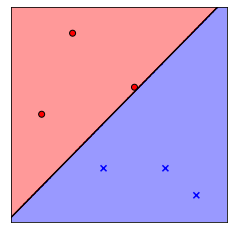

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# 初始化 w 和 b，np.array 相当于定义向量
w, b = np.array([0, 0]), 0 

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 历史信用卡发行数据
# 这里的数据集不能随便修改，否则下面的暴力实现可能停不下来
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5]])
y = np.array([-1, -1, 1, 1, -1, 1])

# 感知机的暴力实现
is_modified = True # 记录是否有分错的点
while is_modified: # 循环，直到没有分错的点
    is_modified = False

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            is_modified = True
            break

# 下面是绘制的代码，主要展示暴力实现的结果，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron().fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set_xticks(()),ax.set_yticks(())

cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

In [6]:
w, b = np.array([0, 0]), 0 
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5]])
y = np.array([-1, -1, 1, 1, -1, 1])
is_modified = True # 记录是否有分错的点
while is_modified: # 循环，直到没有分错的点
    is_modified = False

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            is_modified = True
            break
w,b

(array([-7,  6]), -1)

### 2.4-3

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_43289/1337022183.py:103: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from cur

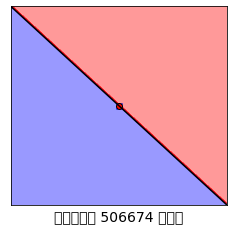

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# 初始化 w 和 b，np.array 相当于定义向量
w, b = np.array([0, 0]), 0 

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 历史信用卡发行数据
# 这里的数据集不能随便修改，否则下面的暴力实现可能停不下来
X = np.array([[3,3], [3.0001,3.0001]])
y = np.array([-1, 1])

# 感知机的暴力实现
times = 0
is_modified = True # 记录是否有分错的点
while is_modified: # 循环，直到没有分错的点
    is_modified = False

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            times += 1
            w, b = w + yi*xi, b + yi
            is_modified = True
            break

# 下面是绘制的代码，主要展示暴力实现的结果，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron(max_iter=40, tol=10).fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set_xticks(()),ax.set_yticks(())

cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('总共经过了 {} 次迭代'.format(times))

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

### 2.4-4

数据集不是线性可分的


/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_1248/2428998669.py:112: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


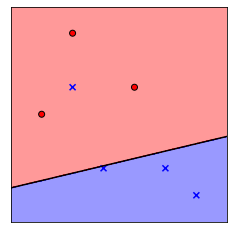

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# 初始化 w 和 b
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积
    
# 历史信用卡发行数据，该数据不是线性可分的
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5], [2,5]])
y = np.array([-1, -1, 1, 1, -1, 1, -1])

# 下面数据集是线性可分的，可以去掉注释看效果
# X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5]])
# y = np.array([-1, -1, 1, 1, -1, 1])

# 感知机的暴力实现
# 如果100次循环都没有找到合适的 w 和 b，说明数据不是线性可分的
# 具体多少次可以根据实际情况设置
is_modified = False
for _ in range(100):
    is_modified = False

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新 w 和 b
            w, b = w + yi*xi, b + yi
            is_modified = True
            break

    # 如果没有更新 w 和 b，说明已经分好了，就跳出 for 循环
    if is_modified == False:
        break

if is_modified == True:
    print('数据集不是线性可分的')

# 下面是绘制的代码，主要展示暴力实现的结果，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron().fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set_xticks(()),ax.set_yticks(())

cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

In [66]:
w, b = np.array([0, 0]), 0 

def d(x):
    return np.dot(w,x)+b 

X = np.array([[3,3], [3.0001,3.0001]])
y = np.array([-1, 1])


times = 0
is_modified = True 
while is_modified: 
    is_modified = False


    for xi, yi in zip(X, y):
        if yi*d(xi) <= 0:
            times += 1
            w, b = w + yi*xi, b + yi
            is_modified = True
            break
times

506674

### 2.4-7

In [68]:
# 载入必要的库
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull
import numpy as np

# 线性可分数据集
X1 = np.array([[1. , 0.2], [1.1, 0.1], [1.2, 0.2], [1.3, 0.2], [1.3, 0.3], [1.3, 0.4], 
    [1.4, 0.1], [1.4, 0.2], [1.4, 0.3], [1.5, 0.1], [1.5, 0.2], [1.5, 0.3], [1.5, 0.4], 
    [1.6, 0.2], [1.6, 0.4], [1.6, 0.6], [1.7, 0.2], [1.7, 0.3], [1.7, 0.4], [1.7, 0.5], 
    [1.9, 0.2], [1.9, 0.4], [3.3, 1. ], [3. , 1.1], [3.7, 1. ], [3.6, 1.3], [3.5, 1. ], 
    [3.8, 1.1], [3.9, 1.1], [3.9, 1.2], [3.9, 1.4], [4. , 1. ], [4. , 1.2], [4. , 1.3],
    [4.1, 1. ], [4.1, 1.3], [4.2, 1.2], [4.2, 1.3], [4.2, 1.5], [4.3, 1.3], [4.3, 1.3], 
    [4.4, 1.3], [4.4, 1.2], [4.4, 1.4], [4.5, 1.3], [4.5, 1.5], [4.5, 1.6], [4.6, 1.3], 
    [4.6, 1.4], [4.6, 1.5], [4.7, 1.2], [4.7, 1.4], [4.7, 1.5], [4.7, 1.6], [4.8, 1.8], 
    [4.9, 1.5], [4.8, 1.4], [5. , 1.7], [5.1, 1.6], 
    ])
y1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, ])

# 计算X1数据集中两种数据的凸包
hull10 = ConvexHull(X1[y1==-1])
hull11 = ConvexHull(X1[y1==1])
# 取出凸包的边界点，构造两个多边形（即轮廓线）
p10 = Polygon(hull10.points[hull10.vertices])
p11 = Polygon(hull11.points[hull11.vertices])
# 这两个多边形不相交，即线性可分
print('两个多边形相交为 {} '.format(p10.intersects(p11)))


# 非线性可分数据集
X2 = np.array([[3. , 1.1], [3.3, 1. ], [3.5, 1. ], [3.6, 1.3], [3.7, 1. ], [3.8, 1.1], 
    [3.9, 1.1], [3.9, 1.2], [3.9, 1.4], [4. , 1. ], [4. , 1.2], [4. , 1.3], [4.1, 1. ], 
    [4.1, 1.3], [4.2, 1.2], [4.2, 1.3], [4.2, 1.5], [4.3, 1.3], [4.4, 1.2], [4.4, 1.3], [4.4, 1.4], 
    [4.5, 1.3], [4.5, 1.5], [4.5, 1.6], [4.5, 1.7], [4.6, 1.3], [4.6, 1.4], [4.6, 1.5], [4.7, 1.2], 
    [4.7, 1.4], [4.7, 1.5], [4.7, 1.6], [4.8, 1.4], [4.8, 1.8], [4.9, 1.5], [4.9, 1.8], [4.9, 2. ], 
    [5. , 1.5], [5. , 1.7], [5. , 1.9], [5. , 2. ], [5.1, 1.5], [5.1, 1.6], [5.1, 1.8], [5.1, 1.9], 
    [5.1, 2. ], [5.1, 2.3], [5.1, 2.4], [5.2, 2. ], [5.2, 2.3], [5.3, 1.9], [5.3, 2.3], [5.4, 2.1], 
    [5.4, 2.3], [5.5, 1.8], [5.5, 2.1], [5.6, 1.4], [5.6, 1.8], [5.6, 2.1], [5.6, 2.2], [5.6, 2.4], 
    [5.7, 2.1], [5.7, 2.3], [5.7, 2.5], [5.8, 1.6], [5.8, 1.8], [5.8, 2.2], [5.9, 2.1], [5.9, 2.3], 
    [6. , 1.8], [6. , 2.5], [6.1, 1.9], [6.1, 2.3], [6.1, 2.5], [6.3, 1.8], [6.4, 2. ], [6.6, 2.1], 
    [6.7, 2. ], [6.7, 2.2], [6.9, 2.3], ])
y2 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 
    1, 1,  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ])

# 分别计算X2数据集中两种数据的凸包
hull20 = ConvexHull(X2[y2==-1])
hull21 = ConvexHull(X2[y2==1])
# 取出凸包的边界点，构造两个多边形（即轮廓线）
p20 = Polygon(hull20.points[hull20.vertices])
p21 = Polygon(hull21.points[hull21.vertices])
# 这两个多边形相交，即线性不可分
print('两个多边形相交为 {} '.format(p20.intersects(p21)))

两个多边形相交为 False 
两个多边形相交为 True 


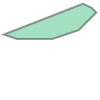

In [76]:
X1 = np.array([[1. , 0.2], [1.1, 0.1], [1.2, 0.2], [1.3, 0.2], [1.3, 0.3], [1.3, 0.4], 
    [1.4, 0.1], [1.4, 0.2], [1.4, 0.3], [1.5, 0.1], [1.5, 0.2], [1.5, 0.3], [1.5, 0.4], 
    [1.6, 0.2], [1.6, 0.4], [1.6, 0.6], [1.7, 0.2], [1.7, 0.3], [1.7, 0.4], [1.7, 0.5], 
    [1.9, 0.2], [1.9, 0.4], [3.3, 1. ], [3. , 1.1], [3.7, 1. ], [3.6, 1.3], [3.5, 1. ], 
    [3.8, 1.1], [3.9, 1.1], [3.9, 1.2], [3.9, 1.4], [4. , 1. ], [4. , 1.2], [4. , 1.3],
    [4.1, 1. ], [4.1, 1.3], [4.2, 1.2], [4.2, 1.3], [4.2, 1.5], [4.3, 1.3], [4.3, 1.3], 
    [4.4, 1.3], [4.4, 1.2], [4.4, 1.4], [4.5, 1.3], [4.5, 1.5], [4.5, 1.6], [4.6, 1.3], 
    [4.6, 1.4], [4.6, 1.5], [4.7, 1.2], [4.7, 1.4], [4.7, 1.5], [4.7, 1.6], [4.8, 1.8], 
    [4.9, 1.5], [4.8, 1.4], [5. , 1.7], [5.1, 1.6], 
    ])
y1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, ])

# 计算X1数据集中两种数据的凸包
hull10 = ConvexHull(X1[y1==-1])
hull11 = ConvexHull(X1[y1==1])
# 取出凸包的边界点，构造两个多边形（即轮廓线）
p10 = Polygon(hull10.points[hull10.vertices])
p11 = Polygon(hull11.points[hull11.vertices])


/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_3135/1107059685.py:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X10[:, 0], y=X10[:, 1], alpha=0.8, color='blue', marker= 'x', edgecolor='k') # 绘制 x 点
/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_3135/1107059685.py:73: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X20[:, 0], y=X20[:, 1], alpha=0.8, color='blue', marker= 'x', edgecolor='k') # 绘制 x 点
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20004 (\N{CJK UNIFIED IDEOGRAPH-4E24}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/p

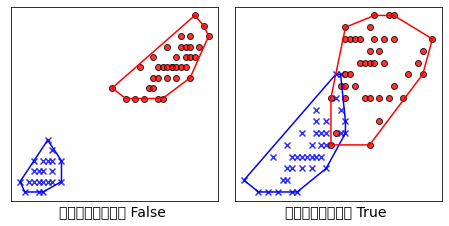

In [2]:
# 引入必要的库
from matplotlib.colors import ListedColormap
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt

# 以下是计算凸包的代码
# 线性可分数据集
X1 = np.array([[1. , 0.2], [1.1, 0.1], [1.2, 0.2], [1.3, 0.2], [1.3, 0.3], [1.3, 0.4], 
    [1.4, 0.1], [1.4, 0.2], [1.4, 0.3], [1.5, 0.1], [1.5, 0.2], [1.5, 0.3], [1.5, 0.4], 
    [1.6, 0.2], [1.6, 0.4], [1.6, 0.6], [1.7, 0.2], [1.7, 0.3], [1.7, 0.4], [1.7, 0.5], 
    [1.9, 0.2], [1.9, 0.4], [3.3, 1. ], [3. , 1.1], [3.7, 1. ], [3.6, 1.3], [3.5, 1. ], 
    [3.8, 1.1], [3.9, 1.1], [3.9, 1.2], [3.9, 1.4], [4. , 1. ], [4. , 1.2], [4. , 1.3],
    [4.1, 1. ], [4.1, 1.3], [4.2, 1.2], [4.2, 1.3], [4.2, 1.5], [4.3, 1.3], [4.3, 1.3], 
    [4.4, 1.3], [4.4, 1.2], [4.4, 1.4], [4.5, 1.3], [4.5, 1.5], [4.5, 1.6], [4.6, 1.3], 
    [4.6, 1.4], [4.6, 1.5], [4.7, 1.2], [4.7, 1.4], [4.7, 1.5], [4.7, 1.6], [4.8, 1.8], 
    [4.9, 1.5], [4.8, 1.4], [5. , 1.7], [5.1, 1.6], 
    ])
y1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, ])
# 计算X1数据集中两种数据的凸包
X10 = X1[y1==-1]
X11 = X1[y1==1]
hull10 = ConvexHull(X10)
hull11 = ConvexHull(X11)

# 非线性可分数据集
X2 = np.array([[3. , 1.1], [3.3, 1. ], [3.5, 1. ], [3.6, 1.3], [3.7, 1. ], [3.8, 1.1], 
    [3.9, 1.1], [3.9, 1.2], [3.9, 1.4], [4. , 1. ], [4. , 1.2], [4. , 1.3], [4.1, 1. ], 
    [4.1, 1.3], [4.2, 1.2], [4.2, 1.3], [4.2, 1.5], [4.3, 1.3], [4.4, 1.2], [4.4, 1.3], [4.4, 1.4], 
    [4.5, 1.3], [4.5, 1.5], [4.5, 1.6], [4.5, 1.7], [4.6, 1.3], [4.6, 1.4], [4.6, 1.5], [4.7, 1.2], 
    [4.7, 1.4], [4.7, 1.5], [4.7, 1.6], [4.8, 1.4], [4.8, 1.8], [4.9, 1.5], [4.9, 1.8], [4.9, 2. ], 
    [5. , 1.5], [5. , 1.7], [5. , 1.9], [5. , 2. ], [5.1, 1.5], [5.1, 1.6], [5.1, 1.8], [5.1, 1.9], 
    [5.1, 2. ], [5.1, 2.3], [5.1, 2.4], [5.2, 2. ], [5.2, 2.3], [5.3, 1.9], [5.3, 2.3], [5.4, 2.1], 
    [5.4, 2.3], [5.5, 1.8], [5.5, 2.1], [5.6, 1.4], [5.6, 1.8], [5.6, 2.1], [5.6, 2.2], [5.6, 2.4], 
    [5.7, 2.1], [5.7, 2.3], [5.7, 2.5], [5.8, 1.6], [5.8, 1.8], [5.8, 2.2], [5.9, 2.1], [5.9, 2.3], 
    [6. , 1.8], [6. , 2.5], [6.1, 1.9], [6.1, 2.3], [6.1, 2.5], [6.3, 1.8], [6.4, 2. ], [6.6, 2.1], 
    [6.7, 2. ], [6.7, 2.2], [6.9, 2.3], ])
y2 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 
    1, 1,  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ])
# 分别计算X2数据集中两种数据的凸包
X20 = X2[y2==-1]
X21 = X2[y2==1]
hull20 = ConvexHull(X20)
hull21 = ConvexHull(X21)

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 创建并排的两个subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.1, wspace=0.08)

# 在第一个subfigure中绘制 X1 数据集
ax = axes[0]
ax.set(xticks=[], yticks=[]) # 不显示坐标的刻度
ax.scatter(x=X10[:, 0], y=X10[:, 1], alpha=0.8, color='blue', marker= 'x', edgecolor='k') # 绘制 x 点
ax.scatter(x=X11[:, 0], y=X11[:, 1], alpha=0.8, color='red', marker= 'o', edgecolor='k') # 绘制 o 点
# 取出凸包的边界点，构造两个多边形
p10 = Polygon(hull10.points[hull10.vertices])
p11 = Polygon(hull11.points[hull11.vertices])
ax.set_xlabel('两个多边形相交为 {} '.format(p10.intersects(p11)))
# 绘制多边形
ax.plot(*p10.exterior.xy, color='blue')
ax.plot(*p11.exterior.xy, color='red')

# 在第二个subfigure中绘制 X2 数据集
ax = axes[1]
ax.set(xticks=[], yticks=[]) # 不显示坐标的刻度
ax.scatter(x=X20[:, 0], y=X20[:, 1], alpha=0.8, color='blue', marker= 'x', edgecolor='k') # 绘制 x 点
ax.scatter(x=X21[:, 0], y=X21[:, 1], alpha=0.8, color='red', marker= 'o', edgecolor='k') # 绘制 o 点
# 取出凸包的边界点，构造两个多边形
p20 = Polygon(hull20.points[hull20.vertices])
p21 = Polygon(hull21.points[hull21.vertices])
ax.set_xlabel('两个多边形相交为 {} '.format(p20.intersects(p21)))
# 绘制多边形
ax.plot(*p20.exterior.xy, color='blue')
ax.plot(*p21.exterior.xy, color='red')

plt.show()

In [82]:
p20.intersects(p21)

True

### 2.5-6

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_4636/4101710587.py:125: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


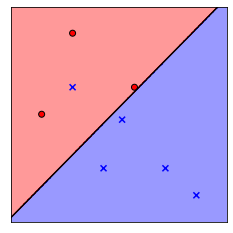

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

# 超参数
epochs = 10 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 历史信用卡发行数据，该数据不是线性可分的
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5], [2,5], [3.6,3.8]])
y = np.array([-1, -1, 1, 1, -1, 1, -1, -1])

# 感知机的口袋算法
# 数据比较简单，设定总的循环次数 10 次就够了
best_w, best_b = w, b
best_cs = clf_score(X, y)
for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(X, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_b = w, b
            break

w, b = best_w, best_b

# 下面是绘制的代码，主要展示暴力实现的结果，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron().fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set_xticks(()),ax.set_yticks(())

cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

In [100]:
X = np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5], [2,5], [3.6,3.8]])
y = np.array([-1, -1, 1, 1, -1, 1, -1, -1])

best_w, best_b = w, b
best_cs = clf_score(X, y)

for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(X, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_b = w, b
            break




-6

### 2.7-1

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_3318/1295652580.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, color=cmap(cl), marker=markers[cl], edgecolor='k')
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from current font.
  fig.canva

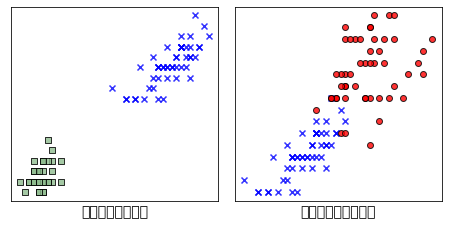

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
import numpy as np

# 载入iris数据集
iris = datasets.load_iris()
sampleCount = 100
# 取前面100个数据（即前两个类别），并且只取最后两个特征，这是线性可分数据集
X1 = iris.data[:sampleCount, [2,3]]
y1 = iris.target[:sampleCount]
# 取后面100个数据（即后两个类别），并且只取最后两个特征，这是非线性可分数据集
X2 = iris.data[50:50+sampleCount, [2,3]]
y2 = iris.target[50:50+sampleCount]

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 创建并排的两个subfigure
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.1, wspace=0.08)

# 在两个并排的subfigure中绘制两个数据集
cmap = ListedColormap(('darkseagreen', 'blue', 'red'))
markers = ('s', 'x', 'o')
Xs = (X1, X2)
ys = (y1, y2)
xlabels = ('线性可分的数据集', '非线性可分的数据集')
for ax, xlabel, X, y in zip(axes.flat, xlabels, Xs, ys):
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(xlabel)

    vmin, vmax = min(y), max(y)
    for cl in np.unique(y):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8, color=cmap(cl), marker=markers[cl], edgecolor='k')

plt.show()

### 2.6-4

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_4636/1553428086.py:134: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


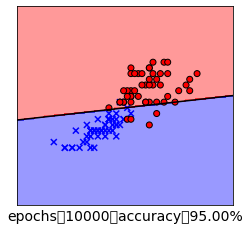

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 超参数
epochs = 10000 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 感知机的口袋算法
best_w, best_b = w, b
best_cs = clf_score(X, y)
for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X, y):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(X, y)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_b = w, b
            break

w, b = best_w, best_b
# 计算准确率
accuracy = 1 - (sampleNumber - best_cs)/2/sampleNumber

# 下面是绘制的代码，主要展示暴力实现的结果，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机，这里是为了借用该感知机的接口，便于绘制决策区域
clf = Perceptron().fit(X, y)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.08)
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlabel(r"epochs：{}，accuracy：{:.2%}".format(epochs, accuracy))


cm = ListedColormap(('blue', 'red'))
markers = ('x', 'o')

# 决定绘制区域的大小
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# 绘制决策区域
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)

# 绘制决策直线
lx = np.linspace(xx.min(), xx.max())
ly = - w[0] / w[1] * lx  - b / w[1]
ax.plot(lx, ly, 'k-')

# 根据类别不同，绘制不同形状的点
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

0.9

### 2.7-4

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_4636/1622597346.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from c

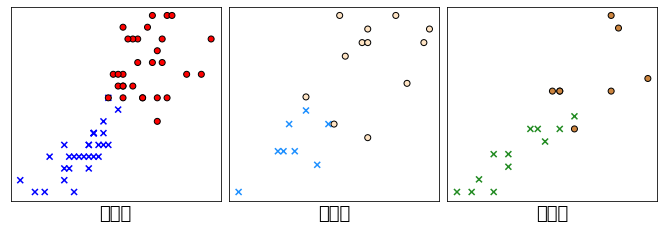

In [122]:
#coding:utf-8
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 6 : 2 : 2 的比例划分为三种数据集
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

# 以下是绘制代码，看不懂没有关系
plt.rcParams.update({'font.size': 18}) # 设置字体大小
# 创建并设置排的两个subfigure
fig, axes = plt.subplots(figsize = (9, 3), nrows=1, ncols=3)
plt.subplots_adjust(left=0.001, right=0.999, top=0.999, bottom=0.1, wspace=0.04)

# 在两个并排的subfigure中绘制训练集和测试集
cmaps = (ListedColormap(('blue', 'red')), ListedColormap(('dodgerblue', 'bisque')), ListedColormap(('forestgreen', 'peru')))
markers, xlabels  = ('x', 'o'), ('训练集', '验证集', '测试集')
Xs, ys = (X_train, X_val, X_test), (y_train, y_val, y_test)
for ax, xlabel, cm, X, y in zip(axes.flat, xlabels, cmaps, Xs, ys):
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(xlabel)

    vmin, vmax = min(y), max(y)
    for cl, m in zip(np.unique(y), markers):
        ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

plt.show()

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_3318/1100928240.py:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_3318/1100928240.py:133: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/U

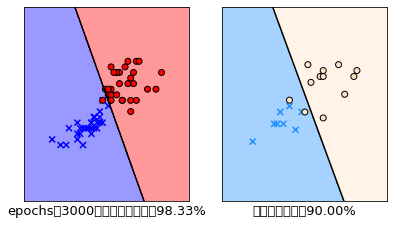

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 超参数
epochs = 3000 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 6 : 2 : 2 的比例划分为三种数据集
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

# 在训练集上训练
best_w, best_b = w, b
best_cs = clf_score(X_train, y_train)
for _ in range(epochs):

    # 顺序遍及数据集 X
    for xi, yi in zip(X_train, y_train):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(X_train, y_train)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_b = w, b
            break

w, b = best_w, best_b
# 计算训练集和验证集上的正确率
train_accuracy = 1 - (len(X_train) - best_cs)/2/len(X_train)
val_accuracy = 1 - (len(X_val) - clf_score(X_val, y_val))/2/len(X_val)


# 下面是绘制的代码，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机
clf = Perceptron(max_iter=40, tol=10).fit(X_train, y_train)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(figsize = (6, 3), nrows=1, ncols=2)
fig.subplots_adjust(left=0.08, right=0.92, top=0.999, bottom=0.1)

# 在两个并排的subfigure中绘制训练集和测试集
cmaps, markers = (ListedColormap(('blue', 'red')), ListedColormap(('dodgerblue', 'bisque'))), ('x', 'o')
xlabels = (r"epochs：{}，训练集准确率：{:.2%}".format(epochs, train_accuracy), r"验证集准确率：{:.2%}".format(val_accuracy))
Xs, ys = (X_train, X_val), (y_train, y_val)
for ax, xlabel, cm, X, y in zip(axes.flat, xlabels, cmaps, Xs, ys):
    # 绘制决策区域
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)
    ax.set(xticks=[], yticks=[])
    ax.set_xlim(xx.min(), xx.max()), ax.set_ylim(yy.min(), yy.max()) 
    ax.set_xlabel(xlabel)

    # 绘制点集
    vmin, vmax = min(y), max(y)
    for cl, m in zip(np.unique(y), markers):
      ax.scatter(x=X0[y==cl], y=X1[y==cl], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

    # 绘制决策直线
    w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]
    lx = np.linspace(xx.min(), xx.max())
    ly = - w1 / w2 * lx  - b / w2
    ax.plot(lx, ly, 'k-')

plt.show()

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_4636/3083687530.py:131: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X0[y_test==cl], y=X1[y_test==cl], c=y_test[y_test==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiahuasong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from curren

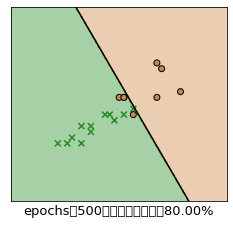

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 超参数
epochs = 500 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 6 : 2 : 2 的比例划分为三种数据集
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

# 在训练集上训练
best_w, best_b = w, b
best_cs = clf_score(X_train, y_train)
for _ in range(epochs):
    # 顺序遍及数据集 X
    for xi, yi in zip(X_train, y_train):
        # 如果有分错的
        if yi*d(xi) <= 0:
            # 更新法向量 w 和 b
            w, b = w + yi*xi, b + yi
            # 对新得到的决策边界进行评分
            cs = clf_score(X_train, y_train)
            # 如果更好，则进行更新
            if cs > best_cs:
                best_cs = cs
                best_w, best_b = w, b
            break

w, b = best_w, best_b
# 计算训练集和验证集上的正确率
train_accuracy = 1 - (len(X_train) - best_cs)/2/len(X_train)
val_accuracy = 1 - (len(X_val) - clf_score(X_val, y_val))/2/len(X_val)
test_accuracy = 1 - (len(X_test) - clf_score(X_test, y_test))/2/len(X_test)

# 下面是绘制的代码，看不懂也没有关系
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 训练 skrlearn 中的感知机
clf = Perceptron(max_iter=40, tol=10).fit(X_train, y_train)
# 根据上面暴力实现得到的 w 和 b 来修改感知机
clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0] = w[0], w[1], b

# 设置字体大小
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.1)

# 在两个并排的subfigure中绘制训练集和测试集
cm, markers = ListedColormap(('forestgreen', 'peru')), ('x', 'o')
xlabel = r"epochs：{}，测试集准确率：{:.2%}".format(epochs, test_accuracy)

# 绘制决策区域
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=cm, alpha=0.4)
ax.set(xticks=[], yticks=[])
ax.set_xlim(xx.min(), xx.max()), ax.set_ylim(yy.min(), yy.max()) 
ax.set_xlabel(xlabel)

# 绘制点集
vmin, vmax = min(y), max(y)
for cl, m in zip(np.unique(y), markers):
  ax.scatter(x=X0[y_test==cl], y=X1[y_test==cl], c=y_test[y_test==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# 绘制决策直线
w1, w2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_[0]
lx = np.linspace(xx.min(), xx.max())
ly = - w1 / w2 * lx  - b / w2
ax.plot(lx, ly, 'k-')

plt.show()

### 2.8-3

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap

# 超参数
epochs = 100 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 感知机的口袋算法
def PLA_pocket(X, y):
    global epochs, w, b

    w, b = np.array([0, 0]), 0 # np.array 相当于定义向量
    best_w, best_b = w, b
    best_cs = clf_score(X, y)
    for _ in range(epochs):

        # 顺序遍及数据集 X
        for xi, yi in zip(X, y):
            # 如果有分错的
            if yi*d(xi) <= 0:
                # 更新法向量 lw 和 lb
                w, b = w + yi*xi, b + yi
                # 对新得到的决策边界进行评分
                cs = clf_score(X, y)
                # 如果更好，则进行更新
                if cs > best_cs:
                    best_cs = cs
                    best_w, best_b = w, b
                break

    w, b = best_w, best_b

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 8 : 2  的比例划分为训练验证集、测试集
rs = 42
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
print(r'总共有 {} 个数据，其中训练验证集中有 {} 个数据，测试集中有 {} 个数据。'.format(len(X), len(X_tv), len(X_test)))

# 在 X_tv 上进行 k 折交叉验证
k = 10
kf = KFold(n_splits=k, random_state=rs, shuffle=True)
val_accuracy = 0
for idx, (train, val) in zip(range(k), kf.split(X_tv)):
    X_train, y_train, X_val, y_val = X_tv[train], y_tv[train], X_tv[val], y_tv[val]
    PLA_pocket(X_train, y_train)
    split_train_accuracy = 1 - (len(X_train) - clf_score(X_train, y_train))/2/len(X_train)
    split_val_accuracy = 1 - (len(X_val) - clf_score(X_val, y_val))/2/len(X_val)
    print(r'第 {} 折，训练集准确率 {:.2%} ，验证集准确率 {:.2%}'.format(idx + 1, split_train_accuracy, split_val_accuracy))
    val_accuracy += split_val_accuracy
print(r'epochs = {}，验证集准确率的平均值为 {:.2%}。'.format(epochs, val_accuracy / k))

总共有 100 个数据，其中训练验证集中有 80 个数据，测试集中有 20 个数据。
第 1 折，训练集准确率 79.17% ，验证集准确率 87.50%
第 2 折，训练集准确率 94.44% ，验证集准确率 87.50%
第 3 折，训练集准确率 95.83% ，验证集准确率 75.00%
第 4 折，训练集准确率 94.44% ，验证集准确率 100.00%
第 5 折，训练集准确率 94.44% ，验证集准确率 87.50%
第 6 折，训练集准确率 94.44% ，验证集准确率 100.00%
第 7 折，训练集准确率 94.44% ，验证集准确率 100.00%
第 8 折，训练集准确率 95.83% ，验证集准确率 87.50%
第 9 折，训练集准确率 94.44% ，验证集准确率 100.00%
第 10 折，训练集准确率 95.83% ，验证集准确率 87.50%
epochs = 100，验证集准确率的平均值为 91.25%。


In [129]:
X_tv.shape

(80, 2)

### 2.8-6

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap

# 超参数
epochs = 100 # 固定的迭代次数

# 参数
w, b = np.array([0, 0]), 0 # np.array 相当于定义向量

# 定义 d(x) 函数
def d(x):
    return np.dot(w,x)+b # np.dot 是向量的点积

# 定义 sign 函数
def sign(x):
    return 1 if x >= 0 else -1

# 定义 h(x) 函数
def h(x):
    return sign(d(x))

# 计算决策边界的评分
def clf_score(X, y):
    score = 0
    for xi, yi in zip(X, y):
        score += yi*h(xi)
    return score

# 感知机的口袋算法
def PLA_pocket(X, y):
    global epochs, w, b

    w, b = np.array([0, 0]), 0 # np.array 相当于定义向量
    best_w, best_b = w, b
    best_cs = clf_score(X, y)
    for _ in range(epochs):

        # 顺序遍及数据集 X
        for xi, yi in zip(X, y):
            # 如果有分错的
            if yi*d(xi) <= 0:
                # 更新法向量 lw 和 lb
                w, b = w + yi*xi, b + yi
                # 对新得到的决策边界进行评分
                cs = clf_score(X, y)
                # 如果更好，则进行更新
                if cs > best_cs:
                    best_cs = cs
                    best_w, best_b = w, b
                break

    w, b = best_w, best_b

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 取后面100个数据，并且只取最后两个特征，以及取出对应的类别
sampleNumber = 100
X = iris.data[50:50+sampleNumber, [2,3]]
# iris 数据集的类别是0, 1, 2，为了运用我们实现的感知机算法，这里将后两个类别改为-1, 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)

# 借助 train_test_split 进行随机分割，按照 8 : 2  的比例划分为训练验证集、测试集
rs = 42
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
print(r'总共有 {} 个数据，其中训练验证集中有 {} 个数据，测试集中有 {} 个数据。'.format(len(X), len(X_tv), len(X_test)))

# 组合两个超参数，计算各种组合得到的验证集准确率的平均值
for epochs in  range(100, 500, 100):
    for k in range(10, 50, 10):
        kf = KFold(n_splits=k, random_state=rs, shuffle=True)
        val_accuracy = 0
        for idx, (train, val) in zip(range(k), kf.split(X_tv)):
            X_train, y_train, X_val, y_val = X_tv[train], y_tv[train], X_tv[val], y_tv[val]
            PLA_pocket(X_train, y_train)
            val_accuracy += 1 - (len(X_val) - clf_score(X_val, y_val))/2/len(X_val)
        print(r'epochs = {}，k={}，验证集准确率的平均值为 {:.2%}。'.format(epochs, k, val_accuracy / k))

总共有 100 个数据，其中训练验证集中有 80 个数据，测试集中有 20 个数据。
epochs = 100，k=10，验证集准确率的平均值为 91.25%。
epochs = 100，k=20，验证集准确率的平均值为 91.25%。
epochs = 100，k=30，验证集准确率的平均值为 91.67%。
epochs = 100，k=40，验证集准确率的平均值为 91.25%。
epochs = 200，k=10，验证集准确率的平均值为 91.25%。
epochs = 200，k=20，验证集准确率的平均值为 91.25%。
epochs = 200，k=30，验证集准确率的平均值为 91.67%。
epochs = 200，k=40，验证集准确率的平均值为 91.25%。
epochs = 300，k=10，验证集准确率的平均值为 91.25%。
epochs = 300，k=20，验证集准确率的平均值为 91.25%。
epochs = 300，k=30，验证集准确率的平均值为 91.67%。
epochs = 300，k=40，验证集准确率的平均值为 91.25%。
epochs = 400，k=10，验证集准确率的平均值为 88.75%。
epochs = 400，k=20，验证集准确率的平均值为 91.25%。
epochs = 400，k=30，验证集准确率的平均值为 91.67%。
epochs = 400，k=40，验证集准确率的平均值为 91.25%。
